# Automatic Differentiation

## Acknowledgements


## Gradients - Why Do They Matter

Suppose we had a linear regression problem:

<table width="100%">
    <tr>
        <td>
\begin{align*} 
y^{\prime} &= ax+b \\
l &= f\left(y^{\prime}, y\right) 
\end{align*}
        </td>
        <td>
<img src="assets/linear_regr_comp_graph.svg" alt="assets/linear_regr_comp_graph.svg">
        </td>
    </tr>
</table>

Update rules for the two model parameters $a$ and $b$:
\begin{align*} 
a &\leftarrow a - \eta\cdot\nabla_al \\
b &\leftarrow b - \eta\cdot\nabla_bl
\end{align*}

Since we're dealing with scalars, let's think about partial derivatives instead:
\begin{align*} 
a &\leftarrow a - \eta\cdot\frac{\partial{l}}{\partial{a}} \\
b &\leftarrow b - \eta\cdot\frac{\partial{l}}{\partial{b}}
\end{align*}

## The Chain Rule

How does $w$ change with some yet-to-be-given variable $t$. All the input variables that $w$ depends or are annotated as $u_i$.

$$
\frac{\partial{w}}{\partial{t}} = \sum_{i}{\left( \frac{\partial{w}}{\partial{u_i}} \cdot \frac{\partial{u_i}}{\partial{t}} \right)}
$$

## Forward-Mode Automatic Differentiation

Suppose we wanted to differentiate:
$$
z = x \cdot y + sin(x)
$$

The equation above is a composition of primitive operations:
<table width="100%">
    <tr>
        <td>
<img src="assets/example_comp_graph.svg" alt="assets/example_comp_graph.svg" style="margin: auto;">
        </td>
        <td>
\begin{align*} 
x &= \mathord{?} \\
y &= \mathord{?} \\
a &= x \cdot y \\
b &= sin (x) \\
z &= a + b
\end{align*} 
        </td>
    </tr>
</table>

Applying the chain rule above to each of these:
<table width="100%">
    <tr>
        <td>
<img width="100%" src="assets/example_comp_graph.svg" alt="assets/example_comp_graph.svg" style="margin: auto;">
        </td>
        <td>
\begin{align*} 
x &= \mathord{?} \\
y &= \mathord{?} \\
a &= x \cdot y \\
b &= sin (x) \\
z &= a + b
\end{align*} 
        </td>
        <td>
\begin{align*} 
\frac{\partial{x}}{\partial{t}} &= \mathord{?} \\
\frac{\partial{y}}{\partial{t}} &= \mathord{?} \\
\frac{\partial{a}}{\partial{t}} &= y \cdot \frac{\partial{x}}{\partial{t}} + x \cdot \frac{\partial{y}}{\partial{t}} \\
\frac{\partial{b}}{\partial{t}} &= cos(x) \cdot \frac{\partial{x}}{\partial{t}} \\
\frac{\partial{z}}{\partial{t}} &= \frac{\partial{a}}{\partial{t}} + \frac{\partial{b}}{\partial{t}} \\
\end{align*}         </td>
    </tr>
</table>

## Revisiting the Chain Rule

<table width="100%">
    <tr>
        <td>
<p>
How does $w$ change with some yet-to-be-given variable $t$. All the input variables that $w$ depends or are annotated as $u_i$.<br/><br/>
</p>
$$
\frac{\partial{w}}{\partial{t}} = \sum_{i}{\left( \frac{\partial{w}}{\partial{u_i}} \cdot \frac{\partial{u_i}}{\partial{t}} \right)}
$$
        </td>
        <td>
<p>
How does $u$ change some yet-to-be-given variable $s$. All the output variables that depend on $u$ are annotated as $w_i$.<br/><br/>
</p>
$$
\frac{\partial{s}}{\partial{u}} = \sum_{i}{\left( \frac{\partial{w_i}}{\partial{u}} \cdot \frac{\partial{s}}{\partial{w_i}} \right)}
$$  
        </td>
    </tr>
</table>

Before, we asked:
> What input variables a given output depends on.

Now, we ask:
> What output variables a given input can affect.

## Reverse-Mode Automatic Differentiation

<table width="100%">
    <tr>
        <td>
\begin{align*} 
x &= \mathord{?} \\
y &= \mathord{?} \\
a &= x \cdot y \\
b &= sin (x) \\
z &= a + b
\end{align*} 
        </td>
        <td>
\begin{align*} 
\frac{\partial{s}}{\partial{z}} &= \mathord{?} \\
\frac{\partial{s}}{\partial{b}} &= \frac{\partial{s}}{\partial{z}} \\
\frac{\partial{s}}{\partial{a}} &= \frac{\partial{s}}{\partial{z}} \\
\frac{\partial{s}}{\partial{y}} &= x \cdot \frac{\partial{s}}{\partial{a}} \\
\frac{\partial{s}}{\partial{x}} &= y \cdot \frac{\partial{s}}{\partial{a}} + cos(x) \cdot \frac{\partial{s}}{\partial{b}} \\
\end{align*}         </td>
    </tr>
</table>



<table width="100%">
    <tr>
        <td>
$$
\frac{\partial{s}}{\partial{u}} = \sum_{i}{\left( \frac{\partial{w_i}}{\partial{u}} \cdot \frac{\partial{s}}{\partial{w_i}} \right)}
$$ 
        </td>
        <td>
<img width="100%" src="assets/example_comp_graph.svg" alt="assets/example_comp_graph.svg" style="margin: auto;">
        </td>
        <td>
\begin{align*} 
\frac{\partial{s}}{\partial{z}} &= \mathord{?} \\
\frac{\partial{s}}{\partial{b}} &= \frac{\partial{s}}{\partial{z}} \\
\frac{\partial{s}}{\partial{a}} &= \frac{\partial{s}}{\partial{z}} \\
\frac{\partial{s}}{\partial{y}} &= x \cdot \frac{\partial{s}}{\partial{a}} \\
\frac{\partial{s}}{\partial{x}} &= y \cdot \frac{\partial{s}}{\partial{a}} + cos(x) \cdot \frac{\partial{s}}{\partial{b}} \\
\end{align*} 
        </td>
    </tr>
</table>

## Demo

NOTE: The following slides are not shown in presentation mode - they define classes and functions that are used in the demos.

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Var:

  def __init__(self, value):
    self.value = value
    self.children = []
    self.grad_value = None

  def _grad(self):
    if self.grad_value is None:
      self.grad_value = sum(weight * var._grad()
                            for weight, var in self.children)
    return self.grad_value

  def _reset_grad(self):
    self.grad_value = None
    for _, var in self.children:
      var._reset_grad()

  def grad_wrt(self, other):
    self.grad_value = 1
    result = other._grad()
    other._reset_grad()
    self._reset_grad()
    return result

In [3]:
# Ops.
def mul(lhs, rhs):
  result = Var(lhs.value * rhs.value)
  lhs.children.append((rhs.value, result))
  rhs.children.append((lhs.value, result))
  return result


def add(lhs, rhs):
  result = Var(lhs.value + rhs.value)
  lhs.children.append((1, result))
  rhs.children.append((1, result))
  return result


def sub(lhs, rhs):
  result = Var(lhs.value - rhs.value)
  lhs.children.append((1, result))
  rhs.children.append((-1, result))
  return result


def cos(x):
  result = Var(math.cos(x.value))
  x.children.append((-math.sin(x.value), result))
  return result


def sin(x):
  result = Var(math.sin(x.value))
  x.children.append((math.cos(x.value), result))
  return result


def square(x):
  result = Var(x.value**2)
  x.children.append((2 * x.value, result))
  return result

In [4]:
# Tests.
a = Var(2)
b = Var(4)
c = mul(a, b)
assert (a.grad_wrt(a) == 1)
assert (a.grad_wrt(b) == 0)
assert (a.grad_wrt(c) == 0)
assert (b.grad_wrt(a) == 0)
assert (b.grad_wrt(b) == 1)
assert (b.grad_wrt(c) == 0)
assert (c.grad_wrt(a) == 4)
assert (c.grad_wrt(b) == 2)
assert (c.grad_wrt(c) == 1)

a = Var(2)
b = Var(4)
c = add(a, b)
assert (a.grad_wrt(a) == 1)
assert (a.grad_wrt(b) == 0)
assert (a.grad_wrt(c) == 0)
assert (b.grad_wrt(a) == 0)
assert (b.grad_wrt(b) == 1)
assert (b.grad_wrt(c) == 0)
assert (c.grad_wrt(a) == 1)
assert (c.grad_wrt(b) == 1)
assert (c.grad_wrt(c) == 1)

a = Var(2)
b = Var(4)
c = sub(a, b)
assert (a.grad_wrt(a) == 1)
assert (a.grad_wrt(b) == 0)
assert (a.grad_wrt(c) == 0)
assert (b.grad_wrt(a) == 0)
assert (b.grad_wrt(b) == 1)
assert (b.grad_wrt(c) == 0)
assert (c.grad_wrt(a) == 1)
assert (c.grad_wrt(b) == -1)
assert (c.grad_wrt(c) == 1)

a = Var(2)
b = cos(a)
assert (a.grad_wrt(a) == 1)
assert (a.grad_wrt(b) == 0)
assert (b.grad_wrt(a) == -math.sin(a.value))
assert (b.grad_wrt(b) == 1)

a = Var(2)
b = sin(a)
assert (a.grad_wrt(a) == 1)
assert (a.grad_wrt(b) == 0)
assert (b.grad_wrt(a) == math.cos(a.value))
assert (b.grad_wrt(b) == 1)

a = Var(2)
b = square(a)
assert (a.grad_wrt(a) == 1)
assert (a.grad_wrt(b) == 0)
assert (b.grad_wrt(a) == 2 * a.value)
assert (b.grad_wrt(b) == 1)

In [5]:
def mse(pred, target):
  result = square(sub(pred, target))
  return result

In [6]:
num_samples = 10


def gen_data():
  np.random.seed(42)

  # Sample data points from a line with AWGN and shuffle them.
  xs = np.linspace(0, 1, num_samples) + np.random.normal(0, 0.1, num_samples)
  ys = np.linspace(0, 1, num_samples) + np.random.normal(0, 0.01, num_samples)
  is_shuffled = np.random.shuffle(np.arange(num_samples))
  xs = xs[is_shuffled]
  ys = ys[is_shuffled]

  return xs, ys


def plot_data(xs, ys):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.scatter(xs, ys)
  ax.set_xlabel('x')
  ax.set_ylabel('y')

In [7]:
def plot_train_stats(xs, ys, a, b, loss_history):
  # Calculate model prediction.
  xs_pred = [xs.min(), xs.max()]
  ys_pred = [a.value * x + b.value for x in xs_pred]

  # Plot loss vs. epochs and predictions.
  fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
  ax0.plot(loss_history)
  ax0.set_xlabel('epoch')
  ax0.set_ylabel('loss')
  ax1.scatter(xs, ys)
  ax1.plot(xs_pred, ys_pred)
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')

### A Basic Implementation of Reverse-Mode Automatic Differentiation

```python
class Var:

  def __init__(self, value):
    self.value = value
    self.children = []
    self.grad_value = None
```

```python
  def _grad(self):
    if self.grad_value is None:
      self.grad_value = sum(weight * var._grad()
                            for weight, var in self.children)
    return self.grad_value
```

```python
def mul(lhs, rhs):
  result = Var(lhs.value * rhs.value)
  lhs.children.append((rhs.value, result))
  rhs.children.append((lhs.value, result))
  return result
```

In [8]:
x = Var(2)
y = Var(3)
z = mul(x, y)
# z = add(mul(x, y), sin(x))  # z = x · y + sin(x)

print(f'x · y = {z.value:.2f}')
print(f'∂z / ∂x = {z.grad_wrt(x):.2f}')
print(f'∂z / ∂y = {z.grad_wrt(y):.2f}')

x · y = 6.00
∂z / ∂x = 3.00
∂z / ∂y = 2.00


### Linear Regression

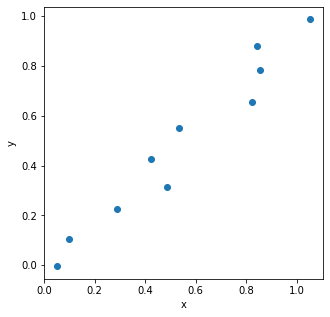

In [9]:
xs, ys = gen_data()
plot_data(xs, ys)

In [10]:
def init_model():
  a = Var(np.random.normal(0, 1, 1)[0])
  b = Var(np.random.normal(0, 1, 1)[0])
  return a, b


# Set hyperparameters.
lr = 0.005
n_epochs = 200

# Buffer to track the loss for each epoch.
loss_history = np.empty(n_epochs)

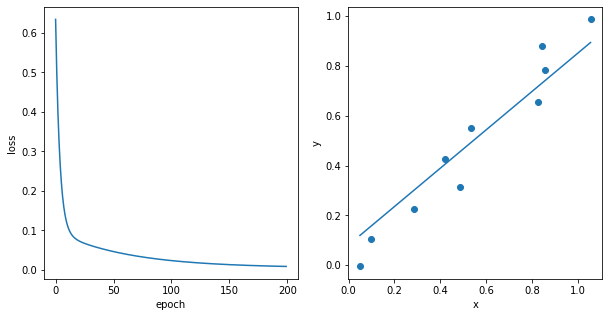

In [11]:
# Initialise model.
a, b = init_model()

# Training loop.
for i in range(n_epochs):
  ga = 0
  gb = 0
  epoch_loss = 0

  for x, y in zip(xs.T, ys.T):
    x = Var(x[0])
    y = Var(y[0])

    y_prime = add(mul(a, x), b)
    loss = mse(y_prime, y)

    ga += loss.grad_wrt(a)
    gb += loss.grad_wrt(b)
    epoch_loss += loss.value

  a = Var(a.value - lr * ga)
  b = Var(b.value - lr * gb)
  loss_history[i] = epoch_loss / num_samples

plot_train_stats(xs, ys, a, b, loss_history)

## References
[1]    Phil Ruffwind; [Reverse-mode automatic differentiation: a tutorial](https://rufflewind.com/2016-12-30/reverse-mode-automatic-differentiation)